# The Sparks Foundation - Data Science and Business Analytics Internship

# Batch - May 2022

# Author - Ashish Roy

Task 1- Predict the percentage of an student based on the number of study hours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("student_scores - student_scores.csv")     #importing dataset

In [3]:
data.head()                                                   #showing the first five records (rows)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape                                               #total number of rows and columns

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().any()                                           #there is no null values in the dataset

Hours     False
Scores    False
dtype: bool

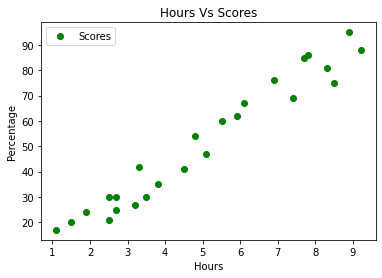

In [7]:
data.plot(x="Hours", y="Scores",color='g',style= 'o')

plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.show()

<AxesSubplot:xlabel='Hours'>

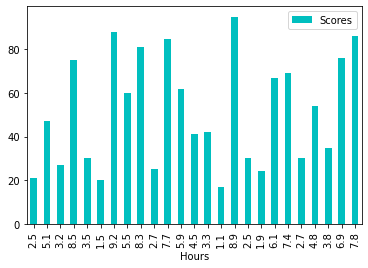

In [8]:
data.plot.bar(x="Hours", y="Scores",color='c',style= 'o')

<AxesSubplot:xlabel='Hours'>

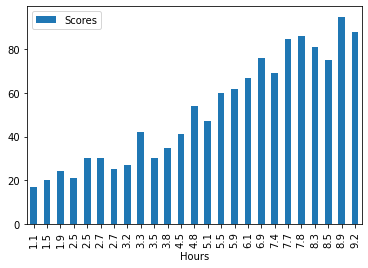

In [9]:
data.sort_values(["Hours"],axis=0, ascending=[True],inplace=True)
data.plot.bar(x="Hours", y ="Scores")

Observations from above graphs-

As study hours increases scores also increases

In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

#dividing the data into inputs and outputs

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
#training the algorithm

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

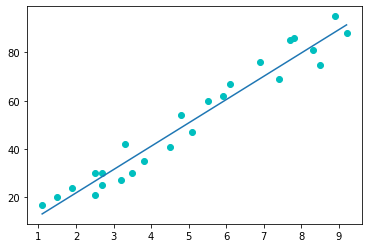

In [16]:
#regression line
line = regressor.coef_*X+regressor.intercept_

#Plotting for test data
plt.scatter(X, y,color="c")
plt.plot(X, line);
plt.show()

## Ready for testing

In [17]:
print("ORIGINAL SCORES")
print(y_test)
print("PREDICTED SCORES")
y_pred = regressor.predict(X_test)
print(y_pred)

ORIGINAL SCORES
[30 24 85 67 41]
PREDICTED SCORES
[28.6177145  20.88803334 76.92822173 61.46885942 46.0094971 ]


In [18]:
datanew = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
datanew

,Actual,Predicted
0,30,28.617714
1,24,20.888033
2,85,76.928222
3,67,61.468859
4,41,46.009497


What will be the predicted score if a student studies for 9.25 hrs/day?

In [20]:
hours = [[9.25]]
prediction= regressor.predict(hours)

print(prediction)

[91.90447898]


#### so the predicted score for 9.25 hours of study per day is 91.9

## Evaluating the model

In [21]:
from sklearn import metrics  
print('Mean absolute error = ',metrics.mean_absolute_error(y_test, y_pred)) 

Mean absolute error =  4.621333622532769


In [22]:
from sklearn.metrics import r2_score
print("R2 Score = ",r2_score(y_test,y_pred))  #checking the performance of model

R2 Score =  0.9503831741928792


## Thankyou